## Q3

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
# from Utils import *
# from Templates import *
from torch.utils.data import Dataset, DataLoader


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import os
path = os.getcwd() + '/drive/MyDrive/ComputerVision/Assignment_3/'

!cp /content/drive/MyDrive/ComputerVision/Assignment_3/Templates.py .
!cp /content/drive/MyDrive/ComputerVision/Assignment_3/Utils.py .

from Utils import *
from Templates import *

In [5]:
trainset = DataAugment(path+ 'dataset/',train= True,type= 2)
train_loader = DataLoader(trainset, batch_size = 128, shuffle = True)

testset = DataAugment(path + 'dataset/',train= False,type = 2)
test_loader = DataLoader(testset, batch_size = 4, shuffle = True)

In [9]:
epochs = 1
lr = 1e-4
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
log_interval = 1
trained = False
# path = './Models/'
save = True

net = Model_Q2().to(device)
crt1 = nn.MSELoss()
crt2 = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr) 


train_losses = []
train_loss = 0

if trained:
    d = torch.load(path+'Models/q3.pth')
    train_losses = d['train_losses']
    net.load_state_dict(d['state_dict'])

In [10]:
for e in range(epochs):
    net.train()
    for idx, data in enumerate(train_loader):
        inpt = data['x'].to(device)
        r = data['y_r'].to(device); cx = data['y_cx'].to(device); cy = data['y_cy'].to(device)
        label = data['y_label'].to(device)
        
#         print(rprobs.shape,label.shape)|
        
        optimizer.zero_grad()
        cprobs, rprobs = net(inpt)        
        loss =  crt1(rprobs[:,0],r) + crt1(rprobs[:,1],cx) + crt1(rprobs[:,2],cy) + crt2(cprobs,label)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if idx %log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e, idx, len(train_loader),
                100. * idx/ len(train_loader), loss.item()))
            if save:
                d = {'state_dict':net.state_dict(), 'train_losses': train_losses}
                torch.save(d,path + 'Models/q3.pth')
                print("Model Saved Epoch: {},Idx:{}".format(e,idx))
        
    train_loss /= len(train_loader.dataset)
    train_loss.append(train_loss)

/content/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()


Train Epoch: 0 [0/469 (0%)]	Loss: 2.325201
Model Saved Epoch: 0,Idx:0
Train Epoch: 0 [1/469 (0%)]	Loss: 2.323042
Model Saved Epoch: 0,Idx:1
Train Epoch: 0 [2/469 (0%)]	Loss: 2.320219
Model Saved Epoch: 0,Idx:2
Train Epoch: 0 [3/469 (1%)]	Loss: 2.319769
Model Saved Epoch: 0,Idx:3
Train Epoch: 0 [4/469 (1%)]	Loss: 2.325107
Model Saved Epoch: 0,Idx:4
Train Epoch: 0 [5/469 (1%)]	Loss: 2.320745
Model Saved Epoch: 0,Idx:5
Train Epoch: 0 [6/469 (1%)]	Loss: 2.317841
Model Saved Epoch: 0,Idx:6
Train Epoch: 0 [7/469 (1%)]	Loss: 2.319575
Model Saved Epoch: 0,Idx:7
Train Epoch: 0 [8/469 (2%)]	Loss: 2.319191
Model Saved Epoch: 0,Idx:8
Train Epoch: 0 [9/469 (2%)]	Loss: 2.317209
Model Saved Epoch: 0,Idx:9
Train Epoch: 0 [10/469 (2%)]	Loss: 2.314570
Model Saved Epoch: 0,Idx:10
Train Epoch: 0 [11/469 (2%)]	Loss: 2.314884
Model Saved Epoch: 0,Idx:11
Train Epoch: 0 [12/469 (3%)]	Loss: 2.316388
Model Saved Epoch: 0,Idx:12
Train Epoch: 0 [13/469 (3%)]	Loss: 2.311627
Model Saved Epoch: 0,Idx:13
Train Epoch:

AttributeError: ignored

tensor([9, 3, 9, 3]) tensor([[0.3534, 0.5023, 0.5683],
        [0.3625, 0.4900, 0.4940],
        [0.3608, 0.4931, 0.5464],
        [0.4247, 0.4775, 0.4568]])


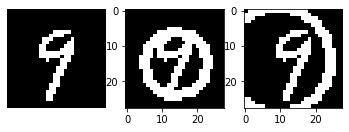

0.46987951807228917


In [11]:
idx,data = next(enumerate(test_loader))
with torch.no_grad():
    o1,o2 = net(data['x'])
print(o1.argmax(dim=1),o2)

plt.subplot(1,3,1)
plt.imshow(data['y_mask'][0][0],cmap = plt.cm.gray)
plt.axis('off')
plt.subplot(1,3,2)
img = data['y_mask'][0][0].numpy().astype(np.uint8); x= 28*data['y_cx'][0]; y = 28*data['y_cy'][0]; r = 28*data['y_r'][0]
cv2.circle(img, (int(x),int(y)),int(r),(1,0,0),thickness = 2)
plt.imshow(img,cmap = plt.cm.gray)

c1 = getMask(x,y,r)


plt.subplot(1,3,3)
img = data['y_mask'][0][0].numpy().astype(np.uint8); x= 28*o2[0,0]; y = 28*o2[0,1]; r = 28*o2[0,2]
cv2.circle(img, (int(x),int(y)),int(r),(1,0,0),thickness = 2)
plt.imshow(img,cmap = plt.cm.gray)


c2 = getMask(x,y,r)
plt.show()
print(np.logical_and(c1 , c2 ).sum()/np.logical_or(c1, c2 ).sum())

In [12]:
JSim2(net,test_loader,device)

/content/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()


tensor(0.6732)